In [2]:
!rm -r pdf_cache

In [14]:
import numpy as np
from tqdm import tqdm

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import blueice as bi
from laidbax import base_model
import pandas as pd
data_dir = base_model.THIS_DIR + '/data/'

In [15]:
data = pd.read_csv(data_dir + 'sr0_search_data.csv')
data['cs1'] = data['cs1_pe']
data['cs2'] = data['cs2_bottom_pe']

In [5]:
m = bi.Model(base_model.config)

In [6]:
m.sources[0]

er[cf74742355d6d2be21d7998e6c6784f08e639473]

In [7]:
list(zip([s.name for s in m.sources], 
         m.expected_events()))

[('er', 62.094794281205225),
 ('cnns', 0.00084416488601637822),
 ('radiogenics', 0.05607761021615898),
 ('ac', 0.21999999947047399),
 ('wall', 0.52000000531947999),
 ('anomalous', 0.090003700793828439),
 ('wimp', 17.537061086329476)]

(1e-11, 0.01)

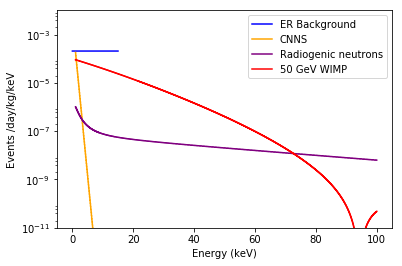

In [8]:
for s in m.sources:
    if hasattr(s, 'energy_distribution'):
        s.energy_distribution.plot(label=s.config['label'], color=s.config['color'])
plt.yscale('log')

plt.ylabel('Events /day/kg/keV')
plt.xlabel("Energy (keV)")
plt.legend(loc='upper right')
plt.ylim(1e-11, 1e-2)

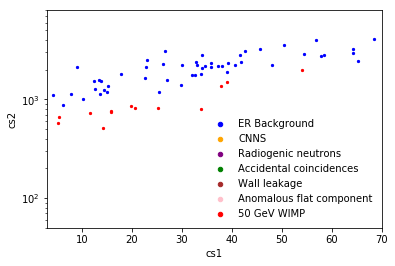

In [9]:
d = m.simulate()
m.show(d)
plt.legend(loc='lower right', scatterpoints=1, markerscale=2, frameon=False)
plt.yscale('log')

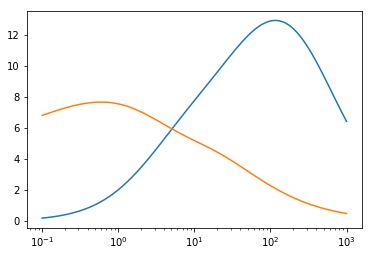

In [10]:
es = np.logspace(-1, 3, 100)
py, qy = m.sources[1].nest_yields(es)
plt.plot(es, py/es)
plt.plot(es, qy/es)
plt.xscale('log')

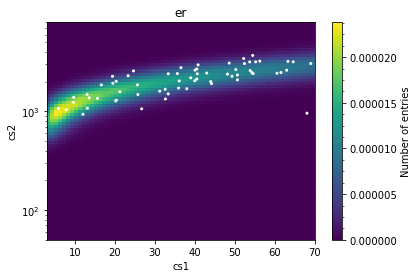

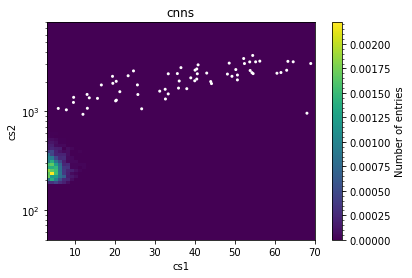

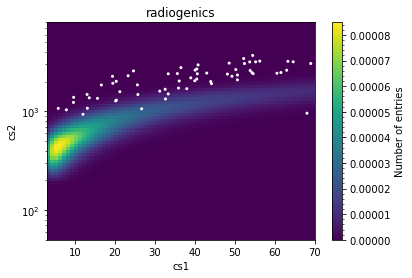

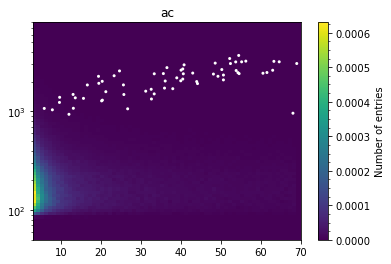

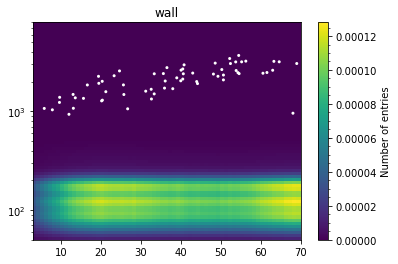

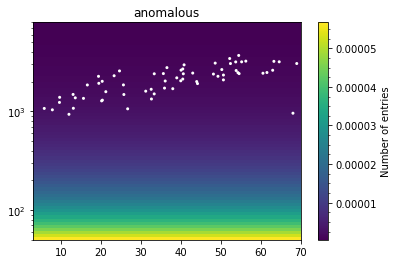

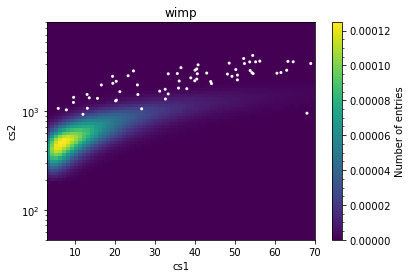

In [19]:
for s in m.sources:
    s._pdf_histogram.plot(log_scale=False)
    plt.scatter(data['cs1'], data['cs2'], c='white', marker='.', edgecolors='none')
    plt.title(s.name)
    plt.yscale('log')
    plt.show()

In [10]:
print([(s.name, s.fraction_in_range) for s in m.sources])

[('er_bg', 0.58494599999999997), ('cnns', 0.00033199999999999999), ('radiogenics', 0.38299299999999997), ('ac', 1), ('wall', 1), ('anomalous', 1), ('wimp_50gev', 0.55280600000000002)]


In [11]:
m.expected_events() / m.config['livetime_days']

array([  1.81625733e+00,   2.34003913e-05,   1.64034254e-03,
         6.43274852e-03,   1.52046785e-02,   2.63168716e-03,
         5.11809654e-01])

In [12]:
(62.1/34.2) #/ (m.expected_events()[0]/m.config['livetime_days'])

1.8157894736842104

In [13]:
#62/34.2